In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [30]:
online = pd.read_excel("C:\\Users\\n243710\Downloads/Online Retail.xlsx")

In [31]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [32]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [33]:
online.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [34]:
online = online.dropna(subset=['CustomerID'])

In [35]:
online.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [36]:
online.duplicated().sum()

5225

In [37]:
online = online.drop_duplicates()

In [39]:
online.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      401604 non-null object
StockCode      401604 non-null object
Description    401604 non-null object
Quantity       401604 non-null int64
InvoiceDate    401604 non-null datetime64[ns]
UnitPrice      401604 non-null float64
CustomerID     401604 non-null float64
Country        401604 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [65]:
df = online[(online['Quantity'] > 0) & (online['UnitPrice'] > 0)]

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      392692 non-null object
StockCode      392692 non-null object
Description    392692 non-null object
Quantity       392692 non-null int64
InvoiceDate    392692 non-null datetime64[ns]
UnitPrice      392692 non-null float64
CustomerID     392692 non-null float64
Country        392692 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [67]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [68]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [75]:
df['InvoiceDay'] = df.InvoiceDate.apply(lambda x: dt.datetime(x.year,x.month,x.day))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [78]:
df['CohortDay'] = df.groupby('CustomerID')['InvoiceDay'].transform('min')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [81]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [94]:
def get_day(a,col):
    year = a[col].dt.year
    month = a[col].dt.month
    day = a[col].dt.day
    return year,month,day

In [95]:
invoice_year,invoice_month,invoice_day = get_day(df,'InvoiceDate')

In [96]:
cohort_year,cohort_month,cohort_day = get_day(df,'CohortDay')

In [97]:
cohortIndex = (invoice_year - cohort_year) *365 + (invoice_month - cohort_month) *30 +(invoice_day - cohort_day) +1

In [98]:
df['CohortIndex'] = cohortIndex

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [102]:
df = df.drop('CohortMonth',axis = 1)

In [103]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay,CohortIndex
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,2011-08-18,112
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,2011-08-18,112
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,2011-08-18,112
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,2011-08-18,112
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-09,2011-08-18,112


In [105]:
df2 = df.copy()
df2['CohortIndex'] = np.ceil(df2.CohortIndex.divide(30)).astype(int)

In [106]:
df2.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay,CohortIndex
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,2011-08-18,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,2011-08-18,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,2011-08-18,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,2011-08-18,4
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-09,2011-08-18,4


In [107]:
df2['CohortMonth'] = df2.CohortDay + pd.offsets.MonthBegin(1)

In [108]:
df2.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay,CohortIndex,CohortMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,2011-08-18,4,2011-09-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,2011-08-18,4,2011-09-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,2011-08-18,4,2011-09-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,2011-08-18,4,2011-09-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-09,2011-08-18,4,2011-09-01


In [110]:
grouping = df2.groupby(['CohortMonth','CohortIndex'])['CustomerID'].apply(pd.Series.nunique)

In [111]:
grouping.reset_index()

,CohortMonth,CohortIndex,CustomerID
0,2011-01-01,1,885
1,2011-01-01,2,325
2,2011-01-01,3,301
3,2011-01-01,4,337
4,2011-01-01,5,317
5,2011-01-01,6,350
6,2011-01-01,7,320
7,2011-01-01,8,306
8,2011-01-01,9,308
9,2011-01-01,10,340


In [114]:
type(grouping)
#cohortdata = grouping.pivot_table(index = 'CohortMonth',columns = 'CohortIndex',values = 'CustomerID')

pandas.core.series.Series

In [115]:
grouping = grouping.to_frame()

In [116]:
type(grouping)

pandas.core.frame.DataFrame

In [117]:
cohortdata = grouping.pivot_table(index = 'CohortMonth',columns = 'CohortIndex',values = 'CustomerID')

In [118]:
cohortdata

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2011-01-01,885.0,325.0,301.0,337.0,317.0,350.0,320.0,306.0,308.0,340.0,359.0,456.0,174.0
2011-02-01,417.0,101.0,117.0,117.0,113.0,117.0,104.0,110.0,134.0,142.0,111.0,4.0,NaN
2011-03-01,380.0,85.0,91.0,109.0,80.0,102.0,98.0,95.0,111.0,88.0,3.0,NaN,NaN
2011-04-01,452.0,82.0,107.0,99.0,85.0,94.0,112.0,116.0,98.0,8.0,NaN,NaN,NaN
2011-05-01,300.0,77.0,49.0,67.0,52.0,65.0,72.0,67.0,6.0,NaN,NaN,NaN,NaN
2011-06-01,284.0,55.0,44.0,57.0,70.0,66.0,69.0,3.0,NaN,NaN,NaN,NaN,NaN
2011-07-01,242.0,37.0,47.0,56.0,67.0,68.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,188.0,35.0,40.0,44.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-01,169.0,36.0,49.0,37.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
base = cohortdata[1]

In [120]:
retention = cohortdata.divide(base, axis = 0).round(3)

In [145]:
retention
retention.index = retention.index.date

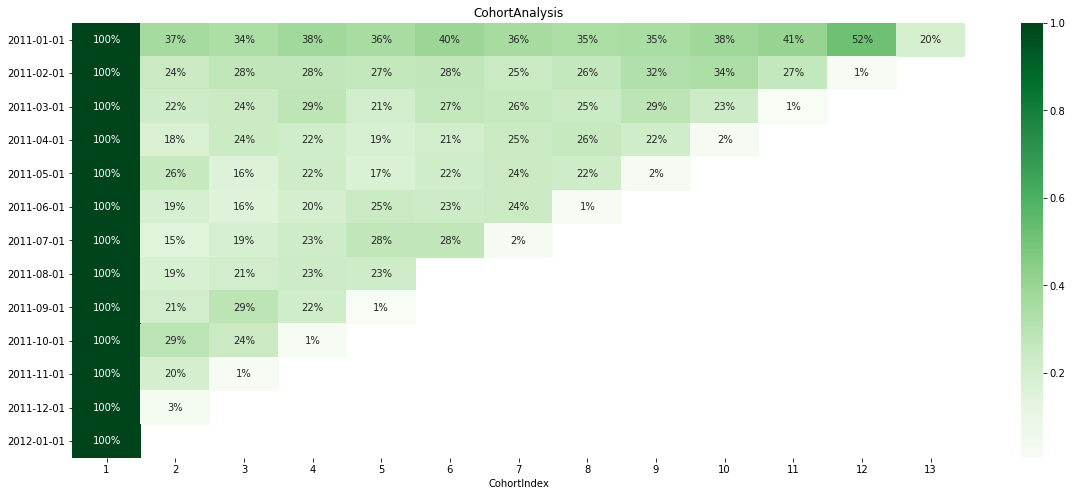

In [146]:
plt.figure(figsize= (20,8))
plt.title('CohortAnalysis')
hm = sns.heatmap(data = retention, annot=True, fmt= '.0%',cmap='Greens', yticklabels = retention.index)
plt.show()